In [79]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer

plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

Input Data and Shape
(200, 5)


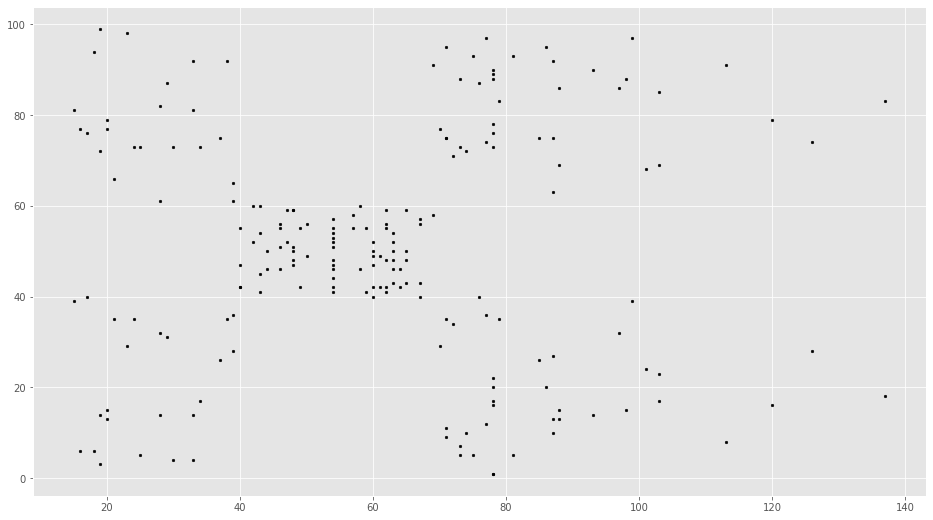

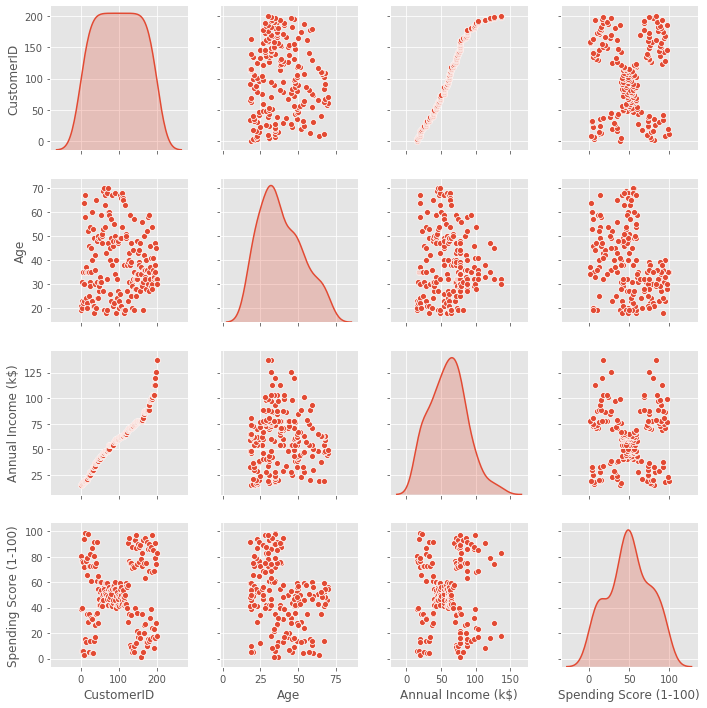

In [81]:
# Importing the dataset

data = pd.read_csv('shopping_data.csv')

print("Input Data and Shape")

print(data.shape)

data.head()

# Getting the values and plotting it

f1 = data['Annual Income (k$)'].values

f2 = data['Spending Score (1-100)'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

sns.pairplot(data,diag_kind='kde')


In [56]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 3)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,269981.280000
1,2,184609.984341
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37442.247450
6,7,33630.441206
7,8,24986.525641
8,9,22131.920511


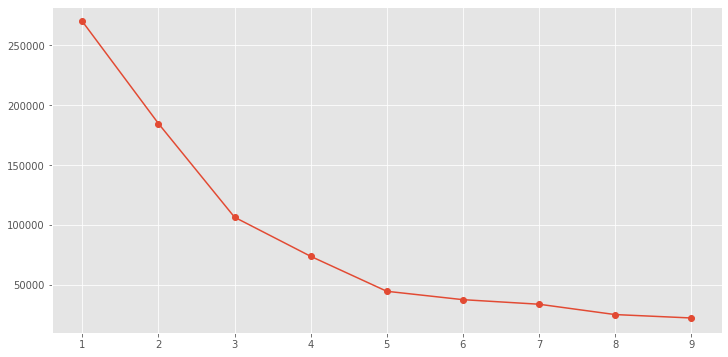

In [57]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [66]:
### # Number of clusters

kmeans = KMeans(n_clusters=5)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

labels = kmeans.predict(X)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


In [67]:
colnames = ["Annual Income (k$)", "Spending Score (1-100)"]
prediction= kmeans.predict(X)
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [59]:
X_df

,Annual Income (k$),Spending Score (1-100),group
0,15,39,5
1,15,81,3
2,16,6,7
3,16,77,3
4,17,40,5
...,...,...,...
195,120,79,0
196,126,28,4
197,126,74,0
198,137,18,4


In [68]:
for i in cluster_range:
    points = np.array(X_df.loc[X_df['group'] == i])
    
points

array([], shape=(0, 3), dtype=int64)

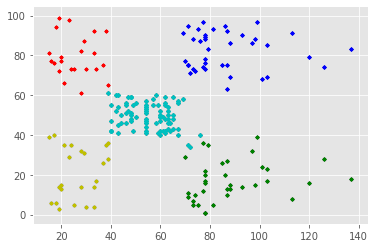

In [69]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])